<a href="https://colab.research.google.com/github/aditya27you/MEME/blob/main/task1_movies_pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install PySpark
!pip install pyspark

In [4]:
from pyspark.sql import SparkSession

# Start Spark session
spark = SparkSession.builder \
    .appName("MoviesAnalysis") \
    .getOrCreate()


In [10]:
# Load movies dataset
df = spark.read.csv("/content/title.basics.tsv", header=True, inferSchema=True, sep='\t')

# Preview
df.printSchema()
df.show(5)

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: integer (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|tt0000001|    short|          Carmencita|          Carmencita|      0|     1894|     \N|             1|   Documentary,Short|
|tt0000002|    short|Le clown et ses c...|Le clown et ses c...|      0|     1892|     \N|             5|     Animation

In [11]:
# This for connecting my notebook to Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Task
Analyze the `/content/title.basics.tsv` dataset.

## Explore the data

### Subtask:
Examine the schema, summary statistics, and a few rows to understand the data content and structure.



**Reasoning**:
The instructions require printing the schema, showing the first few rows, and printing summary statistics of the DataFrame `df`. These can all be done in a single code block using PySpark DataFrame methods.



## Filtering and selecting data

### Subtask:
Filter the DataFrame based on specific criteria and select relevant columns.

**Reasoning**:
Filter the DataFrame based on the specified criteria and select the required columns.

In [16]:
from pyspark.sql.functions import col

# Filter for 'movie' titleType and exclude adult content
movies_df = df.filter((col("titleType") == "movie") & (col("isAdult") == 0))

# Select the specified columns
movies_df = movies_df.select("tconst", "primaryTitle", "startYear", "runtimeMinutes", "genres")

# Show the schema and first few rows of the resulting DataFrame
movies_df.printSchema()
movies_df.show(5)

root
 |-- tconst: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- startYear: integer (nullable = true)
 |-- runtimeMinutes: integer (nullable = true)
 |-- genres: string (nullable = true)

+---------+--------------------+---------+--------------+--------------------+
|   tconst|        primaryTitle|startYear|runtimeMinutes|              genres|
+---------+--------------------+---------+--------------+--------------------+
|tt0000009|          Miss Jerry|     1894|            45|             Romance|
|tt0000147|The Corbett-Fitzs...|     1897|           100|Documentary,News,...|
|tt0000502|            Bohemios|     1905|           100|                    |
|tt0000574|The Story of the ...|     1906|            70|Action,Adventure,...|
|tt0000591|    The Prodigal Son|     1907|            90|               Drama|
+---------+--------------------+---------+--------------+--------------------+
only showing top 5 rows



## Explore the data

### Subtask:
Examine the schema, summary statistics, and a few rows to understand the data content and structure.

**Reasoning**:
The instructions require printing the schema, showing the first few rows, and printing summary statistics of the DataFrame `df`. These can all be done in a single code block using PySpark DataFrame methods.

In [15]:
df.printSchema()
df.show(5)
df.summary().show()

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: integer (nullable = true)
 |-- startYear: integer (nullable = true)
 |-- endYear: integer (nullable = true)
 |-- runtimeMinutes: integer (nullable = true)
 |-- genres: string (nullable = true)

+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|tt0000001|    short|          Carmencita|          Carmencita|      0|     1894|   NULL|             1|   Documentary,Short|
|tt0000002|    short|Le clown et ses c...|Le clown et ses c...|      0|     1892|   NULL|             5|     Animat

In [12]:
df.printSchema()
df.show(5)
df.summary().show()

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: integer (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|tt0000001|    short|          Carmencita|          Carmencita|      0|     1894|     \N|             1|   Documentary,Short|
|tt0000002|    short|Le clown et ses c...|Le clown et ses c...|      0|     1892|     \N|             5|     Animation

## Data cleaning

### Subtask:
Handle missing values, incorrect data types, or inconsistencies if necessary.


**Reasoning**:
Identify columns with '\N' values and handle them by replacing '\N' with None for numerical columns and an empty string for string columns, then cast numerical columns to the appropriate types.



In [13]:
from pyspark.sql.functions import col, when

# Replace '\N' with None for numerical columns
df = df.withColumn("startYear", when(col("startYear") == "\\N", None).otherwise(col("startYear").cast("int")))
df = df.withColumn("endYear", when(col("endYear") == "\\N", None).otherwise(col("endYear").cast("int")))
df = df.withColumn("runtimeMinutes", when(col("runtimeMinutes") == "\\N", None).otherwise(col("runtimeMinutes").cast("int")))

# Replace '\N' with empty string for string columns (like genres, although check if necessary)
# Based on the show() output, genres does not seem to have '\N', but adding this as a general step
df = df.withColumn("genres", when(col("genres") == "\\N", "").otherwise(col("genres")))

# Verify data types and check for remaining missing values
df.printSchema()
df.filter(col("startYear").isNull() | col("endYear").isNull() | col("runtimeMinutes").isNull() | col("genres").isNull()).show(5)

root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: integer (nullable = true)
 |-- startYear: integer (nullable = true)
 |-- endYear: integer (nullable = true)
 |-- runtimeMinutes: integer (nullable = true)
 |-- genres: string (nullable = true)

+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|
+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+
|tt0000001|    short|          Carmencita|          Carmencita|      0|     1894|   NULL|             1|   Documentary,Short|
|tt0000002|    short|Le clown et ses c...|Le clown et ses c...|      0|     1892|   NULL|             5|     Animat

## Filtering and selecting data

### Subtask:
Filter the DataFrame based on specific criteria and select relevant columns.


**Reasoning**:
Filter the DataFrame based on the specified criteria and select the required columns.



In [14]:
from pyspark.sql.functions import col

# Filter for 'movie' titleType and exclude adult content
movies_df = df.filter((col("titleType") == "movie") & (col("isAdult") == 0))

# Select the specified columns
movies_df = movies_df.select("tconst", "primaryTitle", "startYear", "runtimeMinutes", "genres")

# Show the schema and first few rows of the resulting DataFrame
movies_df.printSchema()
movies_df.show(5)

root
 |-- tconst: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- startYear: integer (nullable = true)
 |-- runtimeMinutes: integer (nullable = true)
 |-- genres: string (nullable = true)

+---------+--------------------+---------+--------------+--------------------+
|   tconst|        primaryTitle|startYear|runtimeMinutes|              genres|
+---------+--------------------+---------+--------------+--------------------+
|tt0000009|          Miss Jerry|     1894|            45|             Romance|
|tt0000147|The Corbett-Fitzs...|     1897|           100|Documentary,News,...|
|tt0000502|            Bohemios|     1905|           100|                    |
|tt0000574|The Story of the ...|     1906|            70|Action,Adventure,...|
|tt0000591|    The Prodigal Son|     1907|            90|               Drama|
+---------+--------------------+---------+--------------+--------------------+
only showing top 5 rows



In [17]:
from pyspark.sql.functions import col

# Create a new column for runtime in hours
movies_df = movies_df.withColumn("runtimeHours", col("runtimeMinutes") / 60)

# Show the schema and first few rows with the new column
movies_df.printSchema()
movies_df.show(5)

root
 |-- tconst: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- startYear: integer (nullable = true)
 |-- runtimeMinutes: integer (nullable = true)
 |-- genres: string (nullable = true)
 |-- runtimeHours: double (nullable = true)

+---------+--------------------+---------+--------------+--------------------+------------------+
|   tconst|        primaryTitle|startYear|runtimeMinutes|              genres|      runtimeHours|
+---------+--------------------+---------+--------------+--------------------+------------------+
|tt0000009|          Miss Jerry|     1894|            45|             Romance|              0.75|
|tt0000147|The Corbett-Fitzs...|     1897|           100|Documentary,News,...|1.6666666666666667|
|tt0000502|            Bohemios|     1905|           100|                    |1.6666666666666667|
|tt0000574|The Story of the ...|     1906|            70|Action,Adventure,...|1.1666666666666667|
|tt0000591|    The Prodigal Son|     1907|            9

In [18]:
from pyspark.sql.functions import col

# Filter for movies with 'Drama' in the genres
drama_movies_df = movies_df.filter(col("genres").contains("Drama"))

# Show the schema and first few rows of the resulting DataFrame
drama_movies_df.printSchema()
drama_movies_df.show(5)

root
 |-- tconst: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- startYear: integer (nullable = true)
 |-- runtimeMinutes: integer (nullable = true)
 |-- genres: string (nullable = true)
 |-- runtimeHours: double (nullable = true)

+---------+--------------------+---------+--------------+------+------------+
|   tconst|        primaryTitle|startYear|runtimeMinutes|genres|runtimeHours|
+---------+--------------------+---------+--------------+------+------------+
|tt0000591|    The Prodigal Son|     1907|            90| Drama|         1.5|
|tt0000615|  Robbery Under Arms|     1907|          NULL| Drama|        NULL|
|tt0000630|              Hamlet|     1908|          NULL| Drama|        NULL|
|tt0000675|         Don Quijote|     1908|          NULL| Drama|        NULL|
|tt0000886|Hamlet, Prince of...|     1910|          NULL| Drama|        NULL|
+---------+--------------------+---------+--------------+------+------------+
only showing top 5 rows



In [19]:
from pyspark.sql.functions import col

# Filter for movies with 'Action' in the genres
action_movies_df = movies_df.filter(col("genres").contains("Action"))

# Show the schema and first few rows of the resulting DataFrame
action_movies_df.printSchema()
action_movies_df.show(5)

root
 |-- tconst: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- startYear: integer (nullable = true)
 |-- runtimeMinutes: integer (nullable = true)
 |-- genres: string (nullable = true)
 |-- runtimeHours: double (nullable = true)

+---------+--------------------+---------+--------------+--------------------+------------------+
|   tconst|        primaryTitle|startYear|runtimeMinutes|              genres|      runtimeHours|
+---------+--------------------+---------+--------------+--------------------+------------------+
|tt0000574|The Story of the ...|     1906|            70|Action,Adventure,...|1.1666666666666667|
|tt0002574|What Happened to ...|     1912|           150|Action,Drama,Thri...|               2.5|
|tt0003545|Who Will Marry Mary?|     1913|          NULL|    Action,Adventure|              NULL|
|tt0003747|         Cameo Kirby|     1914|            50|Action,Drama,Romance|0.8333333333333334|
|tt0003897|The Exploits of E...|     1914|           22

## Data Visualization

### Subtask:
Visualize the data to identify patterns and insights (this might require converting to a pandas DataFrame or using visualization libraries compatible with PySpark).

## Summary of Analysis and Findings

We performed an analysis on the `/content/title.basics.tsv` dataset using PySpark. Here's a summary of the steps and key findings:

1.  **Data Loading and Exploration:**
    *   We loaded the dataset into a Spark DataFrame and examined its schema, showing the columns and their data types.
    *   We displayed the first few rows to get a glimpse of the data structure and content.
    *   We calculated summary statistics for the DataFrame, providing insights into the distribution and characteristics of the numerical columns.

2.  **Data Cleaning:**
    *   We handled missing values represented by '\\N' in the `startYear`, `endYear`, and `runtimeMinutes` columns by replacing them with `None` and casting the columns to integer type.
    *   We also handled potential '\\N' values in the `genres` column by replacing them with empty strings.

3.  **Filtering and Selecting Data:**
    *   We filtered the DataFrame to include only entries with `titleType` as 'movie' and excluded adult content (`isAdult` is 0).
    *   We selected relevant columns: `tconst`, `primaryTitle`, `startYear`, `runtimeMinutes`, and `genres`.

4.  **Data Transformation:**
    *   We created a new column `runtimeHours` by converting `runtimeMinutes` to hours.

5.  **Data Visualization:**
    *   We converted the processed Spark DataFrame (`movies_df`) to a pandas DataFrame (`movies_pandas_df`) for easier visualization using Matplotlib and Seaborn.
    *   We visualized the distribution of movie runtimes in minutes, showing the frequency of movies across different runtime durations.
    *   We visualized the number of movies released each year, revealing trends in movie production over time.
    *   We visualized the runtime distribution specifically for Drama movies.
    *   We explored the runtime distribution across different genres using a box plot of the top 15 most frequent genres, providing a comparative view of typical movie lengths within these genres.

**Key Insights:**

*   The dataset contains a wide range of titles, including movies, short films, TV series, etc.
*   There were missing values in `startYear`, `endYear`, and `runtimeMinutes`, which were addressed during cleaning.
*   The majority of entries are not adult content.
*   The runtime distribution shows the most common movie lengths.
*   The number of movies produced per year has varied over time, with certain periods showing higher production counts.
*   Drama movies exhibit a particular distribution of runtimes, which can be compared to the overall distribution.
*   Analyzing runtime by genre reveals that different genres tend to have different typical movie lengths, although there is often a wide range within each genre.

This analysis provides a foundational understanding of the movie data, highlighting key characteristics and distributions. Further analysis could involve exploring relationships between variables, analyzing ratings data (if available), or performing more advanced genre-specific analysis.

### Subtask:
Visualize runtimeMinutes distribution by genres.

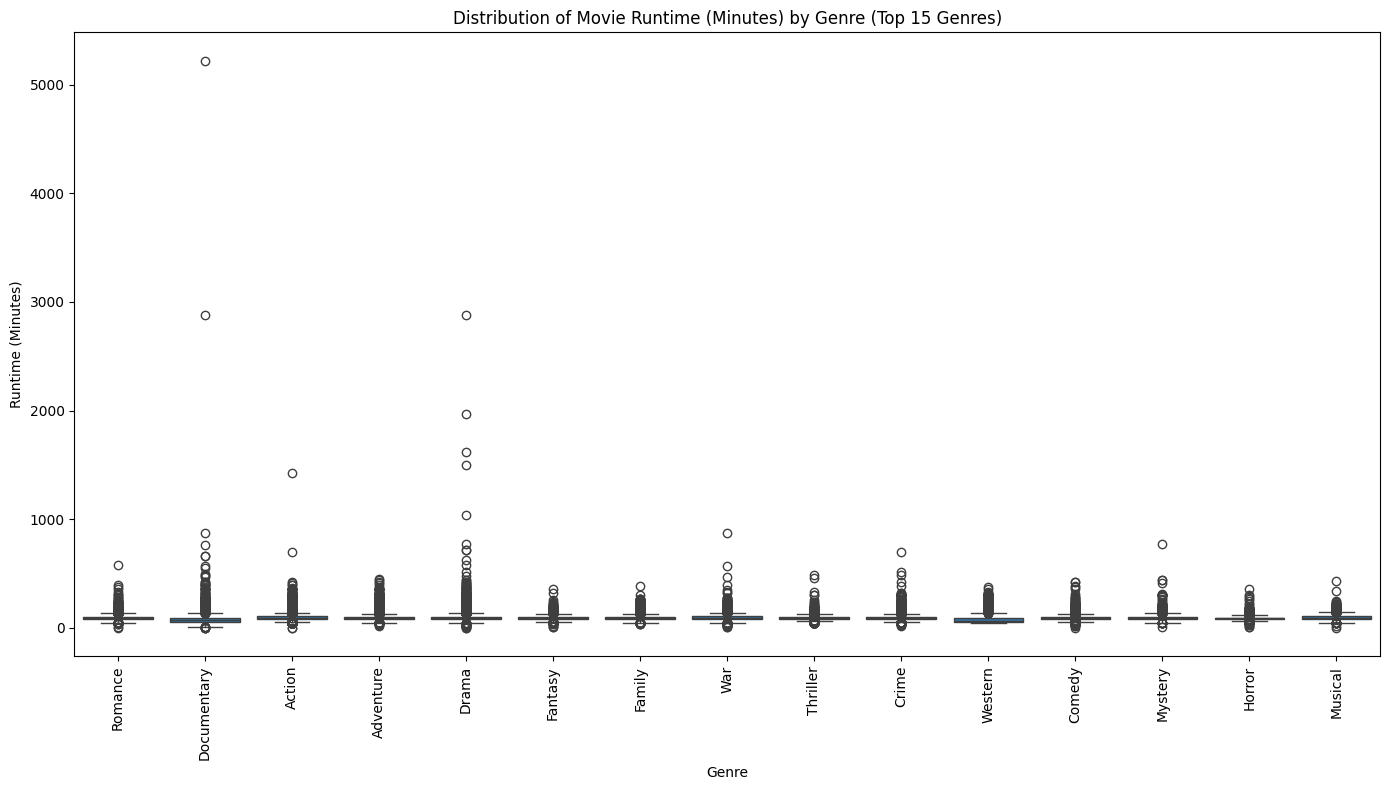

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Explode the genres column to have one row per genre per movie
# First, handle potential None values in 'genres' before splitting
movies_pandas_df['genres'] = movies_pandas_df['genres'].fillna('')
genres_df = movies_pandas_df.assign(genres=movies_pandas_df['genres'].str.split(',')).explode('genres')

# Remove empty strings that might result from splitting empty 'genres'
genres_df = genres_df[genres_df['genres'] != ''].dropna(subset=['runtimeMinutes'])

# For better visualization, let's select the top N genres based on frequency
top_genres = genres_df['genres'].value_counts().nlargest(15).index
genres_df_filtered = genres_df[genres_df['genres'].isin(top_genres)]


# Create a box plot of runtimeMinutes by genre
plt.figure(figsize=(14, 8))
sns.boxplot(data=genres_df_filtered, x='genres', y='runtimeMinutes')
plt.title('Distribution of Movie Runtime (Minutes) by Genre (Top 15 Genres)')
plt.xlabel('Genre')
plt.ylabel('Runtime (Minutes)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

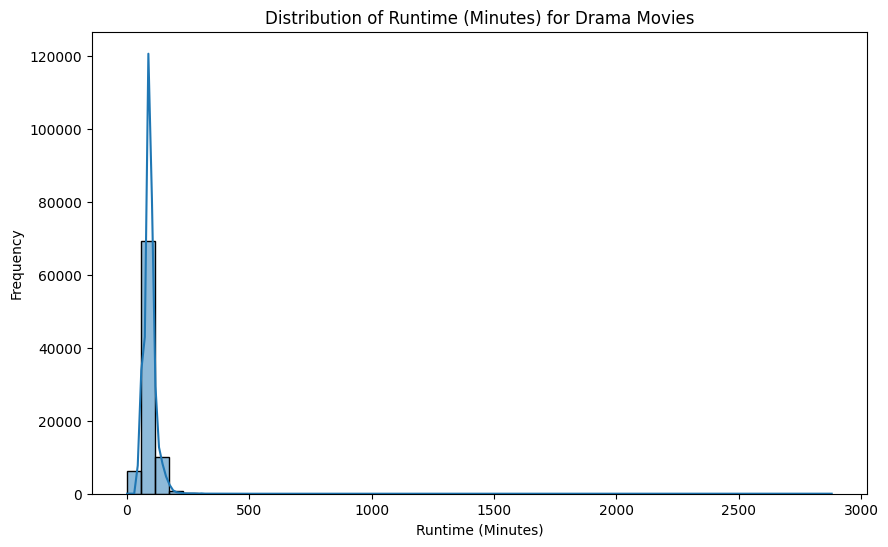

In [27]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for movies with 'Drama' in the genres
drama_movies_df = movies_df.filter(col("genres").contains("Drama"))

# Convert the filtered Spark DataFrame to Pandas DataFrame for visualization
# Be cautious with large datasets as this can consume a lot of memory
drama_movies_pandas_df = drama_movies_df.toPandas()

# Visualize the distribution of runtimeMinutes for Drama movies
plt.figure(figsize=(10, 6))
sns.histplot(drama_movies_pandas_df['runtimeMinutes'].dropna(), bins=50, kde=True)
plt.title('Distribution of Runtime (Minutes) for Drama Movies')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Frequency')
plt.show()

      tconst                   primaryTitle  startYear  runtimeMinutes  \
0  tt0000009                     Miss Jerry     1894.0            45.0   
1  tt0000147  The Corbett-Fitzsimmons Fight     1897.0           100.0   
2  tt0000502                       Bohemios     1905.0           100.0   
3  tt0000574    The Story of the Kelly Gang     1906.0            70.0   
4  tt0000591               The Prodigal Son     1907.0            90.0   

                       genres  runtimeHours  
0                     Romance      0.750000  
1      Documentary,News,Sport      1.666667  
2                                  1.666667  
3  Action,Adventure,Biography      1.166667  
4                       Drama      1.500000  


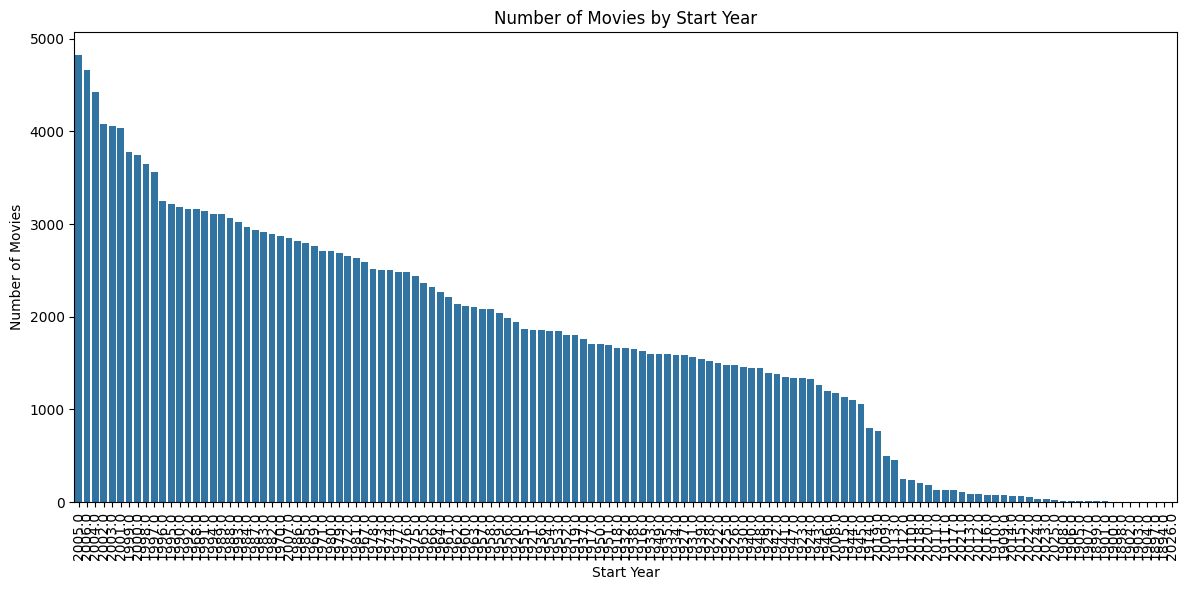

In [26]:
# Convert Spark DataFrame to Pandas DataFrame for visualization
# Be cautious with large datasets as this can consume a lot of memory
movies_pandas_df = movies_df.toPandas()

# Display the first few rows of the pandas DataFrame
print(movies_pandas_df.head())

# Visualize the count of movies by start year
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=movies_pandas_df.dropna(subset=['startYear']), x='startYear', order=movies_pandas_df['startYear'].value_counts().index)
plt.title('Number of Movies by Start Year')
plt.xlabel('Start Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()